In [281]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0, kernel=None):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
        self.kernel = kernel
    def transform_poly(self, X, Y=None):
    # Finding the Square of X1, X2
        X['x1^2'] = X['x1'] ** 2
        X['x2^2'] = X['x2'] ** 2
        # Finding the product of X1 and X2
        X['x1 * x2'] = X['x1'] * X['x2']
        # Converting dataset to numpy array
        X = X.to_numpy()
        if Y.size != 0:
            Y = Y.to_numpy()
            return X, Y
        else:
            return X
    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        
        # Regularizer term
        
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000): # epochs=1000 là n_iter nếu đọc một số tài liệu 
        
        if(self.kernel == "poly"):
            print("SVM(kernel='poly')")
            
            X, Y = self.transform_poly(X, Y)
        else:
            X = X.to_numpy()
            Y = Y.to_numpy()
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)
                        # Yi(W*x+b) > 1 
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        if(self.kernel == "poly"):
            X = self.transform_poly(X, np.array([]))
        else:
            X.to_numpy()
        linear_prediction = np.dot(X, self.w[0]) + self.b
        return np.sign(linear_prediction)
    

In [282]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

x_df = pd.DataFrame(X)

y = np.where(y == 0, -1, 1)
y_df = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.5, random_state=42)




In [283]:
svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

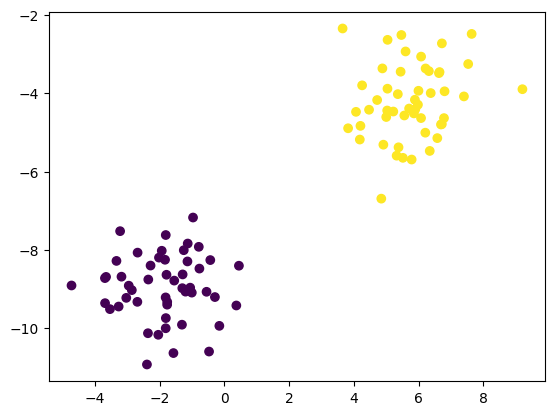

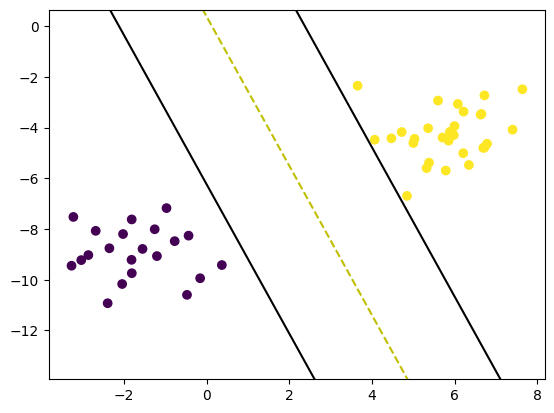

In [284]:
# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]
    X_test_arr = X_test.to_numpy()
    y_test_arr = y_test.to_numpy()
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test_arr[:, 0], X_test_arr[:, 1], marker="o", c=y_test_arr)

    x0_1 = np.amin(X_test_arr[:, 0])
    x0_2 = np.amax(X_test_arr[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])


    plt.show()


visualize_dataset()
visualize_svm()

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.06, random_state=42)

df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))
X = df[['x1', 'x2']]
y = df['y']

# Replacing 0 with -1 for the SVM model to recognize labels
y = y.replace(0, -1)

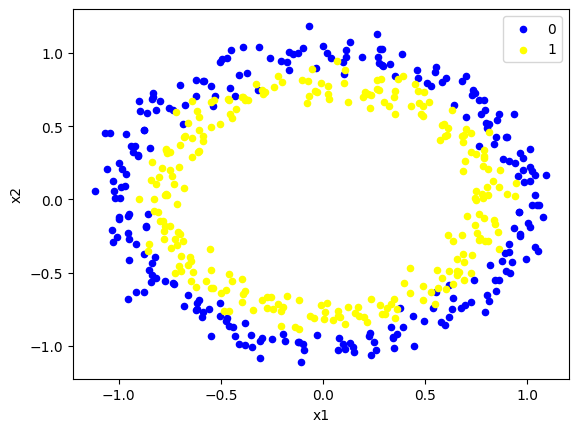

In [286]:
colors = {0:'blue', 1:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
from sklearn.metrics import accuracy_score


svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

accuracy_score(pred, y_test)

0.4666666666666667

In [289]:
from sklearn.metrics import accuracy_score
# Replacing 0 with -1 for the SVM model to recognize labels

svm_poly = SVM(kernel="poly")

w, b, losses = svm_poly.fit(X_train, y_train)

pred = svm_poly.predict(X_test)

accuracy_score(pred, y_test)

SVM(kernel='poly')


0.9533333333333334